In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import torch.nn as nn
from random import seed
import torch
from torch.utils.data import DataLoader, random_split, Subset, Dataset
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Topic Modeling - LDA

In [18]:
# Load the dataset(500 raw reviews from Quora)
df=pd.read_csv("quora.csv")

In [19]:
# Step 1: Data Preparation

# Combine title and content into a single text column to provide a fuller context for each review
df['text'] = df['title'].fillna('') + " " + df['content'].fillna('')

# Text Cleaning
# Ensure all text data is treated as string and clean text
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    text = text.lower()                    # Convert to lower case
    lemmatizer = WordNetLemmatizer()       # NLTK's lemmatizer
    words = text.split()
    
    # list comprehension for filtering stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)


# Step 2: Creating a Document-Term Matrix(DTM)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Remove domain specific stop words like 'apple', 'vision', 'pro'
from nltk.corpus import stopwords
stop = list(stopwords.words('english')) + ['apple', 'vision', 'pro', 'would', 'could','may','also']


vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop)
dtm = vectorizer.fit_transform(df['clean_text'])


# Each feature is a word(bag of words)
dtm_feature_names = vectorizer.get_feature_names_out()


print(dtm_feature_names[0:10])
print(dtm.shape)

# Split dataset into train (80%) and test sets (20%)
# The test sets will be used to evaluate perplexity of topic modeling
X_train, X_test = train_test_split(dtm, test_size=0.2, random_state=42)


# Step 3: Training a LDA Model with sklearn
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 7

lda_sk = LatentDirichletAllocation(n_components=num_topics, \
                                max_iter=30,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=42)

lda_sk.fit(X_train)

['ability' 'able' 'abnormality' 'absence' 'absolutely' 'accelerate'
 'accept' 'acceptance' 'access' 'accessibility']
(500, 3281)
iteration: 1 of max_iter: 30, perplexity: 1798.7600
iteration: 2 of max_iter: 30, perplexity: 1528.6976
iteration: 3 of max_iter: 30, perplexity: 1443.3206
iteration: 4 of max_iter: 30, perplexity: 1396.5443
iteration: 5 of max_iter: 30, perplexity: 1366.5972
iteration: 6 of max_iter: 30, perplexity: 1347.3887
iteration: 7 of max_iter: 30, perplexity: 1333.6908
iteration: 8 of max_iter: 30, perplexity: 1324.0993
iteration: 9 of max_iter: 30, perplexity: 1316.7247
iteration: 10 of max_iter: 30, perplexity: 1310.0432
iteration: 11 of max_iter: 30, perplexity: 1303.9228
iteration: 12 of max_iter: 30, perplexity: 1299.2328
iteration: 13 of max_iter: 30, perplexity: 1295.4042
iteration: 14 of max_iter: 30, perplexity: 1292.2188
iteration: 15 of max_iter: 30, perplexity: 1289.5041
iteration: 16 of max_iter: 30, perplexity: 1287.5130
iteration: 17 of max_iter: 30, p

LatentDirichletAllocation(evaluate_every=1, max_iter=30, n_components=7,
                          n_jobs=1, random_state=42, verbose=1)

In [9]:
# Check topic and word distribution per topic

num_top_words=20

# lda.components_ returns a KxN matrix
# for word distribution in each topic.
# Each row consists of 
# pseudo-counts of each word that represents 
# the number of times word j was assigned to topic i. 
# It can also be viewed as distribution over the words 
# for each topic after normalization

for topic_idx, topic in enumerate(lda_sk.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(dtm_feature_names[i],'%.2f'%topic[i]) \
           for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('device', '122.81'), ('feature', '86.55'), ('like', '85.31'), ('one', '83.54'), ('user', '81.94'), ('product', '79.50'), ('make', '75.35'), ('performance', '72.18'), ('technology', '62.82'), ('price', '59.83'), ('video', '55.69'), ('chip', '55.16'), ('use', '51.86'), ('thing', '50.04'), ('time', '48.61'), ('high', '47.52'), ('customer', '45.74'), ('experience', '44.40'), ('get', '43.50'), ('battery', '42.69')]


Topic 1:
[('experience', '228.28'), ('ar', '200.44'), ('user', '196.55'), ('virtual', '189.50'), ('reality', '162.75'), ('technology', '162.40'), ('device', '122.63'), ('headset', '113.41'), ('application', '113.05'), ('feature', '111.76'), ('real', '107.42'), ('potential', '101.81'), ('immersive', '97.35'), ('capability', '96.22'), ('augmented', '94.94'), ('world', '85.76'), ('like', '76.23'), ('integration', '74.54'), ('environment', '68.16'), ('advanced', '66.20')]


Topic 2:
[('user', '43.26'), ('health', '33.95'), ('device', '30.23'), ('design', '23.53'), ('audi

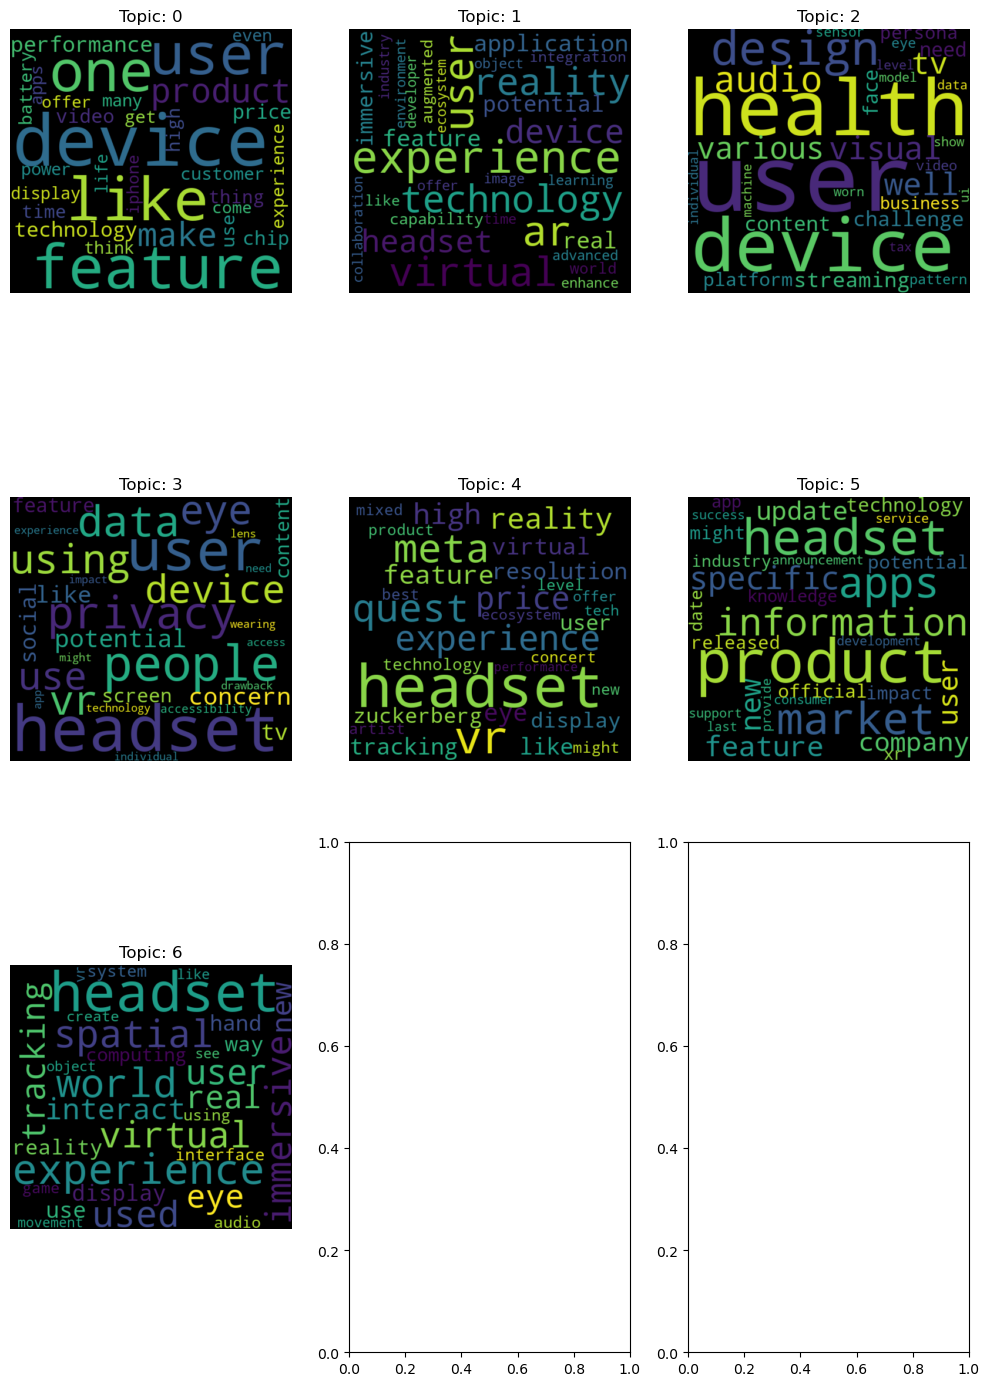

In [10]:
# Step 4: Visualizing Topics

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

num_top_words = 30
# Setup a 3x3 grid
f, axarr = plt.subplots(3, 3, figsize=(10, 15))

for topic_idx, topic in enumerate(lda_sk.components_):
    row = math.floor(topic_idx / 3)  # Determine which row the subplot should be in
    col = topic_idx % 3             # Determine which column the subplot should be in
    f_dict = {dtm_feature_names[i]: topic[i] for i in topic.argsort()[::-1][:num_top_words]}
    
    # Create a word cloud for each topic
    wordcloud = WordCloud(width=480, height=450, margin=0, background_color="black")
    wordcloud.generate_from_frequencies(frequencies=f_dict)
    
    # Display the word cloud in the corresponding subplot
    axarr[row, col].imshow(wordcloud, interpolation="bilinear")
    axarr[row, col].set_title("Topic: " + str(topic_idx))
    axarr[row, col].axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Step 5: Evaluate topic models by perplexity of test data

perplexity=lda_sk.perplexity(X_test)
print("perplexity: {:.2f}".format(perplexity))

perplexity: 9021.41


In [12]:
# Step 6: Try to find the best number of topics
# Vary variable num_topics, for each value, train a LDA model and calculate perplexity on the test data

import numpy as np
import matplotlib.pyplot as plt

result=[]
for num_topics in range(2,10):
    lda = LatentDirichletAllocation(n_components=num_topics, \
                                learning_method='online', \
                                max_iter=30,verbose=0, n_jobs=1,
                                random_state=0).fit(X_train)
    p=lda.perplexity(X_test)
    result.append([num_topics,p])
    print(num_topics, p)

2 3310.9398337910575
3 4245.8024418111345
4 4813.310431195261
5 5024.485458846861
6 5204.983768768726
7 6281.83631386281
8 6574.866700710438
9 7000.858768420815


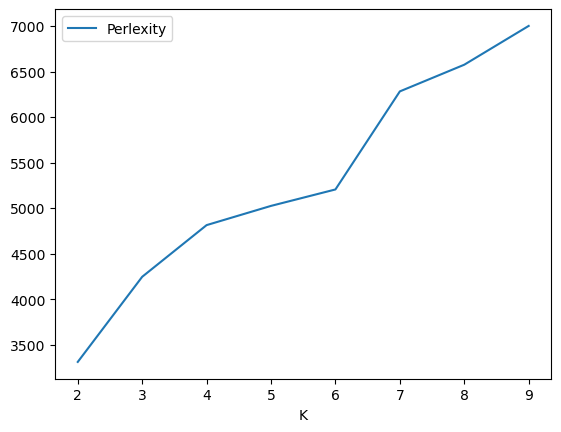

In [13]:
# Visualization
import pandas as pd
pd.DataFrame(result, columns=["K", "Perlexity"]).plot.line(x='K',y="Perlexity");
plt.show();

# K-mean

In [15]:
def preprocess_text(text):
    if pd.isna(text):
        return ""  # Return an empty string for NaN values
    text = str(text).lower()  # Convert text to string and lowercase
    text = re.sub(r'\bapple\b|\bvision\b|\bpro\b', '', text)  # Remove specified words
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove non-alphanumeric characters
    return text


def load_data(file_path):
    try:
        # Try reading with the default UTF-8 encoding
        return pd.read_csv(file_path)
    except UnicodeDecodeError:
        try:
            # Try reading with ISO-8859-1 encoding
            return pd.read_csv(file_path, encoding='ISO-8859-1')
        except UnicodeDecodeError:
            # Try reading with cp1252 encoding
            return pd.read_csv(file_path, encoding='cp1252')

train_data = load_data('quora_sentence.csv')
# test_data = load_data('quora_sentence.csv')

In [16]:
# Preprocess the text data
train_data['cleaned_content'] = train_data['sentence'].apply(preprocess_text)
# test_data['cleaned_content'] = test_data['sentence'].apply(preprocess_text)

# Vectorize the content
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(train_data['cleaned_content'])
# X_test = vectorizer.transform(test_data['cleaned_content'])

# Apply k-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=7, random_state=42)

In [17]:
# Predict the clusters for both train and test sets
train_data['cluster'] = kmeans.predict(X_train)
# test_data['cluster'] = kmeans.predict(X_test)

# Since k-means is unsupervised, we'll evaluate clusters visually or based on domain knowledge
# You can use the centroids or the top terms per cluster to understand what each cluster represents

print("Train Data Cluster Distribution:\n", train_data['cluster'].value_counts())
#print("Test Data Cluster Distribution:\n", test_data['cluster'].value_counts())

# Optionally, extract top terms per cluster to understand the themes
def get_top_terms(tfidf_vector, clusters, n_terms=10):
    terms = np.array(vectorizer.get_feature_names_out())
    top_terms = {}
    for i in range(7):  # Adjust the range for the number of clusters
        cluster_docs_idx = np.where(clusters == i)[0]
        centroid = np.mean(tfidf_vector[cluster_docs_idx], axis=0)
        top_term_indices = centroid.argsort()[::-1][:n_terms]
        top_terms[i] = terms[top_term_indices]
    return top_terms

print("Top terms per cluster:", get_top_terms(X_train, train_data['cluster']))



Train Data Cluster Distribution:
 0    584
1     99
6     71
3     61
2     58
4     46
5     40
Name: cluster, dtype: int64
Top terms per cluster: {0: array([['nike', 'listening', 'literally', 'contact', 'localization',
        'logo', 'low', 'comments', 'ask', 'arvr', 'meta', 'mixedreality',
        'networks', 'discomfort', 'architecture', 'perceived',
        'perception', 'photos', 'application', 'promises', 'library',
        'r1', 'launching', 'introducing', 'encourages', 'ensures',
        'enthusiasts', 'gaze', 'generally', 'globally', 'groundbreaking',
        'hefty', 'developed', 'highprofile', 'bullish', 'branding',
        'immersed', 'impacting', 'bloomberg', 'implications',
        'inclusivity', 'influenced', 'believes', 'later', 'reach',
        'difficult', 'slowly', 'signals', 'viewed', 'solutions',
        'vanguard', 'conditions', 'stryker', 'shape', 'conflicts',
        'tesla', 'tour', 'tracking', 'removing', 'unitys', 'ultimately',
        'term', 'concerts', '

<Figure size 1000x700 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1b7a339aca0>,
 [Text(-0.41800810207017874, -1.1248418673767826, 'Extended Reality Tech'),
  Text(1.047282369188057, 0.3364515406233861, 'Industry Applications'),
  Text(0.7111985547399576, 0.8391642364494543, 'Innovative Tech Solutions'),
  Text(0.2940684300429351, 1.0599640363956144, 'Virtual and Augmented Reality'),
  Text(-0.13081672980226844, 1.0921936564565098, 'Digital Marketing and Advertising'),
  Text(-0.4882448647010656, 0.9857063214228863, 'Healthcare and Accessibility'),
  Text(-0.7430384433131296, 0.8111065723804741, 'Consumer Technology')],
 [Text(-0.24383805954093757, -0.6561577559697898, '60.9%'),
  Text(0.5712449286480311, 0.1835190221582106, '10.3%'),
  Text(0.3879264844036132, 0.45772594715424775, '7.4%'),
  Text(0.16040096184160094, 0.578162201670335, '6.4%'),
  Text(-0.07135457989214641, 0.5957419944308234, '6.0%'),
  Text(-0.2663153807460357, 0.5376579935033925, '4.8%'),
  Text(-0.4052936963526161, 0.4424217667529859, '4.2%')])

(-1.1480507751354097,
 1.1037216661333153,
 -1.2112055469238525,
 1.1073681501566754)

Text(0.5, 1.0, 'Distribution of Topics Across Clusters')

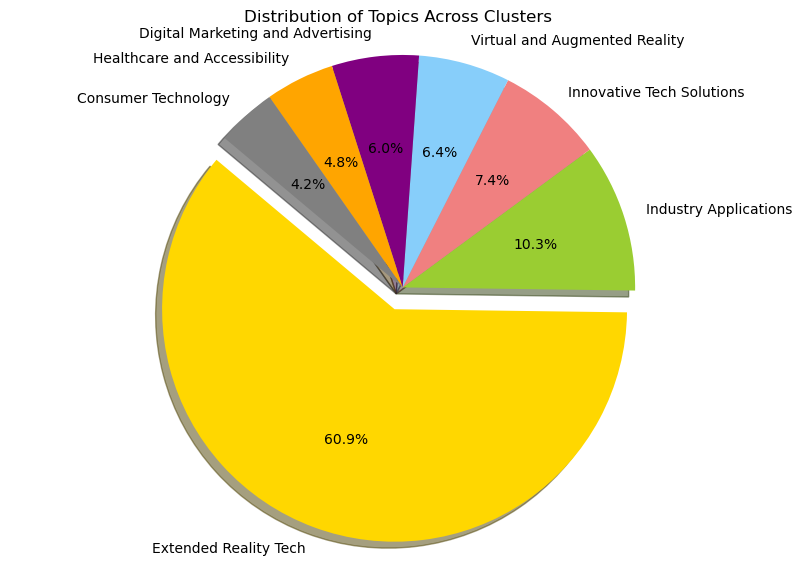

In [18]:
import matplotlib.pyplot as plt

# Define the cluster names based on their topics
cluster_names = ['Extended Reality Tech', 'Industry Applications', 'Innovative Tech Solutions',
                 'Virtual and Augmented Reality', 'Digital Marketing and Advertising',
                 'Healthcare and Accessibility', 'Consumer Technology']

# Cluster sizes based on the earlier message counts
sizes = [584, 99, 71, 61, 58, 46, 40]  # The size of each cluster

# Choose colors for each cluster
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'orange', 'grey']

# Explode the 1st slice (make it stand out for emphasis on the largest cluster)
explode = (0.1, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=cluster_names, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Topics Across Clusters')
plt.show()

# Feature Prediction - Longformer Model

In [30]:
df = pd.read_excel('quora_signed.xlsx')

df.head()
df.info()

# Check for null values in each column
print(df.isnull().sum())

# Ensure no missing values
df.dropna(inplace=True)

# Label encoding for features
label_encoder = LabelEncoder()
df['features_encoded'] = label_encoder.fit_transform(df['features'])

# Split the dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(df['content'], df['features_encoded'], test_size=0.1, random_state=42)


,Unnamed: 0,content,features,sentiment keywords
0,0,I was one of the first members of the public t...,experience,neutral
1,1,Though it completely filled your entire vision...,vision,negative
2,2,There was all kinds of distortion from the mis...,vision,negative
3,3,I love the convenience and simplicity of it ‚ ...,general,positive
4,4,"You point with your eyes (yep, it follows that...",general,positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          231 non-null    int64 
 1   content             231 non-null    object
 2   features            231 non-null    object
 3   sentiment keywords  231 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.3+ KB
Unnamed: 0            0
content               0
features              0
sentiment keywords    0
dtype: int64


count    231.000000
mean     105.562771
std      136.229615
min        4.000000
25%       28.000000
50%       49.000000
75%      103.500000
max      704.000000
Name: content, dtype: float64


(array([55., 65., 37., 13.,  9.,  6.,  4.,  1.,  5.,  1.,  3.,  2.,  1.,
         7.,  3.,  0.,  0.,  4.,  5.,  5.,  0.,  1.,  1.,  1.,  0.,  0.,
         0.,  1.,  0.,  1.]),
 array([  4.        ,  27.33333333,  50.66666667,  74.        ,
         97.33333333, 120.66666667, 144.        , 167.33333333,
        190.66666667, 214.        , 237.33333333, 260.66666667,
        284.        , 307.33333333, 330.66666667, 354.        ,
        377.33333333, 400.66666667, 424.        , 447.33333333,
        470.66666667, 494.        , 517.33333333, 540.66666667,
        564.        , 587.33333333, 610.66666667, 634.        ,
        657.33333333, 680.66666667, 704.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distribution of Token Lengths')

Text(0.5, 0, 'Token Count')

Text(0, 0.5, 'Number of Texts')

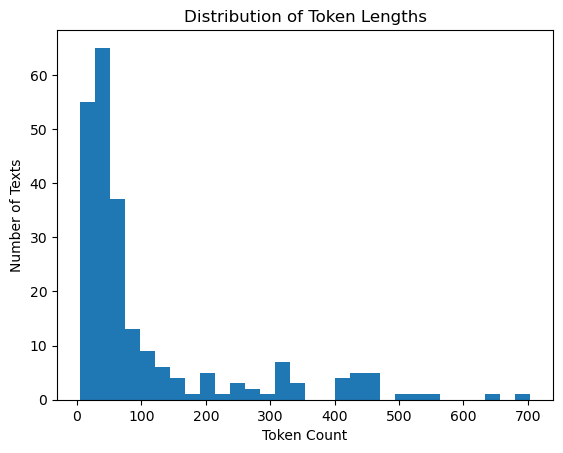

In [31]:
# Check the text lengths in terms of tokens in each review 

from transformers import LongformerTokenizer

tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
token_lengths = df['content'].apply(lambda x: len(tokenizer.tokenize(x)))

# Display statistical summary
print(token_lengths.describe())

# Plot a histogram to visualize the distribution
import matplotlib.pyplot as plt

plt.hist(token_lengths, bins=30)
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Count')
plt.ylabel('Number of Texts')
plt.show()

In [32]:
# Step 3: Tokenization
# Use the Longformer tokenizer to convert texts to a format suitable for the model, including attention masks

from transformers import LongformerTokenizer

tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

def encode_texts(texts):
    return tokenizer.batch_encode_plus(
        texts,
        max_length=900,  # Based on the longest text length(704), we set this parameter to 900
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

train_encodings = encode_texts(train_texts)
val_encodings = encode_texts(val_texts)

In [33]:
# Step 4: Create Torch Dataset
# Convert these encodings into a PyTorch dataset

import torch
from torch.utils.data import Dataset, DataLoader

class LongformerDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = LongformerDataset(train_encodings, train_labels.to_numpy())
val_dataset = LongformerDataset(val_encodings, val_labels.to_numpy())

In [34]:
# Step 5: Initialize the Model
# Configure the Longformer model for classification.

from transformers import LongformerForSequenceClassification

model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=len(label_encoder.classes_))

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
# Step 6: Training Setup
# Set up the training loop, optimizers, and move the model to a GPU if available.

from transformers import AdamW
from torch.optim.lr_scheduler import StepLR

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Scheduler
scheduler = StepLR(optimizer, step_size=1000, gamma=0.1)

LongformerForSequenceClassification(
  (longformer): LongformerModel(
    (embeddings): LongformerEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (position_embeddings): Embedding(4098, 768, padding_idx=1)
    )
    (encoder): LongformerEncoder(
      (layer): ModuleList(
        (0-11): 12 x LongformerLayer(
          (attention): LongformerAttention(
            (self): LongformerSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (query_global): Linear(in_features=768, out_features=768, bias=True)
              (key_global): Linear(in_features=768, out_features=768, bias=True)
          

D:\AN\lib\site-packages\transformers\optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [36]:
# Step 7: Train the Model
# Implement the training loop, handling device assignment for each batch, and performing backpropagation

from tqdm import tqdm

def train(epoch):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        scheduler.step() 
        optimizer.zero_grad()
        total_loss += loss.item()
    print(f"Training loss: {total_loss / len(train_loader)}")

# Training call for X epoch
train(1)

  0%|          | 0/52 [00:00<?, ?it/s]C:\Users\70752\AppData\Local\Temp\ipykernel_33020\2108694804.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 52/52 [35:43<00:00, 41.21s/it]

Training loss: 1.8311821566178248


In [37]:
# Step 8: Evaluation
# Evaluate the model on the validation set

def evaluate():
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_loader):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs[0]
            total_loss += loss.item()
    print(f"Validation loss: {total_loss / len(val_loader)}")

evaluate()

  0%|          | 0/6 [00:00<?, ?it/s]C:\Users\70752\AppData\Local\Temp\ipykernel_33020\2108694804.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 6/6 [00:57<00:00,  9.56s/it]

Validation loss: 1.571793258190155


In [38]:
# Evaluatate the model performance with accuracy scores and classification report
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

def evaluate_metrics(model, loader):
    model.eval()
    true_labels = []
    predictions = []

    with torch.no_grad():
        for batch in tqdm(loader):
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            logits = outputs.logits
            predicted_labels = torch.argmax(logits, dim=-1)
            predictions.extend(predicted_labels.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    report = classification_report(true_labels, predictions, target_names=label_encoder.classes_)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Classification Report:\n", report)

# Example use of the evaluation with metrics
evaluate_metrics(model, val_loader)


  0%|          | 0/6 [00:00<?, ?it/s]C:\Users\70752\AppData\Local\Temp\ipykernel_33020\2108694804.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 6/6 [00:59<00:00,  9.84s/it]

Accuracy: 0.375
Precision: 0.140625
Recall: 0.375
F1 Score: 0.2045454545454545
Classification Report:
               precision    recall  f1-score   support

       AR/VR       0.00      0.00      0.00         2
  experience       0.00      0.00      0.00         1
     general       0.00      0.00      0.00         6
     headset       0.00      0.00      0.00         2
       price       0.00      0.00      0.00         1
  technology       0.38      1.00      0.55         9
      vision       0.00      0.00      0.00         3

    accuracy                           0.38        24
   macro avg       0.05      0.14      0.08        24
weighted avg       0.14      0.38      0.20        24




D:\AN\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\AN\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\AN\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\AN\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score 

In [ ]:
# Step 9: Save the Model and Tokenizer

# Define the path to save the model
model_save_path = '/Users/amber/Documents/Stevens Institute of Tech/Curriculum/2024 Spring/BIA 660-C/Final Project_AVP/Code'

# Create the directory if it does not exist
import os
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

# Save the model and the tokenizer
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

In [ ]:
# Step 10: Define the Feature Predictionn Function
# 1. Take a DataFrame containing the reviews, the tokenizer, and the trained Longformer model as inputs
# 2. Process the reviews, predict the features using the model
# 3. Return the DataFrame with a new column for the predicted features


import pandas as pd
import torch
from transformers import LongformerTokenizer, LongformerForSequenceClassification

# Load the model and tokenizer from the saved directory
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
model = LongformerForSequenceClassification.from_pretrained('/Users/amber/Documents/Stevens Institute of Tech/Curriculum/2024 Spring/BIA 660-C/Final Project_AVP/Code')
model.eval()  # Set the model to evaluation mode

def predict_features(df, tokenizer, model):
    # Encode the reviews
    inputs = tokenizer(df['content'].tolist(), max_length=1024, padding=True, truncation=True, return_tensors="pt")
    
    # Move inputs to the same device as model
    input_ids = inputs['input_ids'].to(model.device)
    attention_mask = inputs['attention_mask'].to(model.device)
    
    # Predict
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=-1)
    
    # Decode predicted feature indices to feature names (if label_encoder was used during training)
    predicted_features = [label_encoder.classes_[i] for i in predictions.cpu().numpy()]
    
    # Add predictions to the DataFrame
    df['predicted_feature'] = predicted_features
    return df

In [ ]:
# Testing with New Review

df = pd.DataFrame({
    'content': [
        "I was one of the first members of the public to experience the Apple Vision Pro demo.",
        "Though it completely filled your entire vision field, it didn’t work perfectly.",
        "What sets this display apart is its True Tone technology which adjusts the white balance according to the surrounding light, providing more natural-looking colors. This feature enhances the viewing experience, especially when reading or browsing through photos."
        # Add more examples as needed
    ]
})


predicted_df = predict_features(df, tokenizer, model)
print(predicted_df)

In [ ]:
# Testing with New Dataset
# Using the labeled Quora reviews which have been seperated into single sentences to test the prediction

df = pd.read_csv("quora.csv")


predicted_df = predict_features(df, tokenizer, model


# KNN

In [20]:
df = pd.read_csv('quora_sentence.csv')

In [21]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features to manage resource usage

# Fit and transform the 'sentence' column
tfidf_features = tfidf_vectorizer.fit_transform(df['sentence'])

# The target variable is the 'features' column
y = df['features']

# Splitting the data into training and testing sets using only the TF-IDF features
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_features, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model on the training data with only TF-IDF features
knn.fit(X_train, y_train)

# Predict the categories on the testing set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN model: {accuracy:.2f}')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy of the KNN model: 0.48
Classification Report:
               precision    recall  f1-score   support

       AR/VR       0.00      0.00      0.00         7
  experience       0.00      0.00      0.00         5
     general       0.75      0.14      0.23        65
     headset       1.00      0.20      0.33        15
       price       0.00      0.00      0.00         6
  technology       0.46      0.99      0.62        81
      vision       0.00      0.00      0.00        13

    accuracy                           0.48       192
   macro avg       0.32      0.19      0.17       192
weighted avg       0.52      0.48      0.37       192



D:\AN\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\AN\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\AN\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

In [25]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Different values for the number of neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Predict the categories on the testing set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Final accuracy of the KNN model: {accuracy:.2f}')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


D:\AN\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\AN\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

Best parameters: {'metric': 'euclidean', 'n_neighbors': 15}
Best cross-validation score: 0.46
Final accuracy of the KNN model: 0.40
Classification Report:
               precision    recall  f1-score   support

       AR/VR       0.00      0.00      0.00         7
  experience       0.00      0.00      0.00         5
     general       0.29      0.23      0.26        65
     headset       0.00      0.00      0.00        15
       price       0.00      0.00      0.00         6
  technology       0.44      0.75      0.55        81
      vision       0.00      0.00      0.00        13

    accuracy                           0.40       192
   macro avg       0.10      0.14      0.12       192
weighted avg       0.28      0.40      0.32       192



D:\AN\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\AN\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

In [26]:
# Manually testing different values for n_neighbors
neighbors_settings = [3, 5, 7, 10, 15]
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Neighbors: {n_neighbors}, Accuracy: {accuracy:.2f}')

Neighbors: 3, Accuracy: 0.48
Neighbors: 5, Accuracy: 0.34
Neighbors: 7, Accuracy: 0.39
Neighbors: 10, Accuracy: 0.36
Neighbors: 15, Accuracy: 0.40


D:\AN\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\AN\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy

# Install and load necessary libraries
!pip install spacy
!python -m spacy download en_core_web_sm
nltk.download('stopwords')

# Define text preprocessing using NLTK
def preprocess_text_nltk(texts):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    processed_texts = []
    for text in texts:
        words = text.split()
        filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
        processed_texts.append(' '.join(filtered_words))
    return processed_texts

# Define text preprocessing using SpaCy
nlp = spacy.load('en_core_web_sm')
def preprocess_text_spacy(texts):
    processed_texts = []
    for text in texts:
        doc = nlp(text)
        clean_tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
        processed_texts.append(" ".join(clean_tokens))
    return processed_texts

# Apply preprocessing and vectorization
df['processed_content_nltk'] = preprocess_text_nltk(df['sentence'])
df['processed_content_spacy'] = preprocess_text_spacy(df['sentence'])

# Initialize and fit TF-IDF Vectorizer for both preprocessing outputs
tfidf_vectorizer_nltk = TfidfVectorizer(max_features=5000, max_df=0.7, min_df=5, ngram_range=(1, 2))
tfidf_features_nltk = tfidf_vectorizer_nltk.fit_transform(df['processed_content_nltk'])

tfidf_vectorizer_spacy = TfidfVectorizer(max_features=5000)
tfidf_features_spacy = tfidf_vectorizer_spacy.fit_transform(df['processed_content_spacy'])

# Split the data into training and testing sets for both vectorized data
X_train_nltk, X_test_nltk, y_train, y_test = train_test_split(tfidf_features_nltk, df['features'], test_size=0.2, random_state=42)
X_train_spacy, X_test_spacy, y_train, y_test = train_test_split(tfidf_features_spacy, df['features'], test_size=0.2, random_state=42)

# Train and evaluate the KNN model for both preprocessing outputs
knn_nltk = KNeighborsClassifier(n_neighbors=5)
knn_nltk.fit(X_train_nltk, y_train)
y_pred_nltk = knn_nltk.predict(X_test_nltk)

knn_spacy = KNeighborsClassifier(n_neighbors=5)
knn_spacy.fit(X_train_spacy, y_train)
y_pred_spacy = knn_spacy.predict(X_test_spacy)

# Print accuracy and classification report for both models
print(f'Accuracy with NLTK Preprocessing: {accuracy_score(y_test, y_pred_nltk):.2f}')
print("Classification Report for NLTK Preprocessing:\n", classification_report(y_test, y_pred_nltk))

print(f'Accuracy with SpaCy Preprocessing: {accuracy_score(y_test, y_pred_spacy):.2f}')
print("Classification Report for SpaCy Preprocessing:\n", classification_report(y_test, y_pred_spacy))

     --------------------------------------- 12.8/12.8 MB 54.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\70752\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy with NLTK Preprocessing: 0.47
Classification Report for NLTK Preprocessing:
               precision    recall  f1-score   support

       AR/VR       0.00      0.00      0.00         7
  experience       0.00      0.00      0.00         5
     general       0.45      0.58      0.51        65
     headset       1.00      0.13      0.24        15
       price       0.00      0.00      0.00         6
  technology       0.49      0.63      0.55        81
      vision       0.00      0.00      0.00        13

    accuracy                           0.47       192
   macro avg       0.28      0.19      0.18       192
weighted avg       0.44      0.47      0.42       192

Accuracy with SpaCy Preprocessing: 0.39
Classification Report for SpaCy Preprocessing:
               precision    recall  f1-score   support

       AR/VR       0.00      0.00      0.00         7
  experience       0.00      0.00      0.00         5
     general       0.29      0.34      0.31        65
     headset

D:\AN\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\AN\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

# RNN

In [11]:
random_seed = 124
seed(random_seed)

torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True

import pandas as pd
from sklearn.utils import shuffle

data = pd.read_csv("quora_sentence.csv")
# data = pd.read_csv("Emotion_final.csv")
data.head()
len(data)

data = shuffle(data)

label_map = {'technology':0, 'general':1, 'vision':2, 'headset':3, 'AR/VR':4, 'price':5, 'experience':6}
data["label"] = data.features.apply(lambda x: label_map[x])
# label_map = {'fear':0, 'happy':1, 'anger':2, 'surprise':3, 'sadness':4, 'love':5}
# data["label"] = data.Emotion.apply(lambda x: label_map[x])
data
data.label.value_counts()

# train_data = data.iloc[0: 15000]
# eval_data = data.iloc[15000: 18000]
# test_data = data.iloc[18000: ]
total_rows = data.shape[0]
train_data = data.iloc[0:int(total_rows * 0.75)]  # 75% for training
eval_data = data.iloc[int(total_rows * 0.75):int(total_rows * 0.90)]  # 15% for evaluation
test_data = data.iloc[int(total_rows * 0.90):]  # 10% for testing
train_data.shape
test_data.shape

class EmotionDataset(Dataset):

    # define your dataset
    def __init__(self, featuers, labels):
        self.length = len(labels)
        self.features = torch.Tensor(featuers)
        self.labels = torch.Tensor(labels)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

    def __len__(self):
        return self.length

def preprocess(train_data, eval_data, test_data, vocab_size=10000, max_sent=100):
    tokenizer = Tokenizer(num_words=vocab_size, oov_token='<UNK>')
    tokenizer.fit_on_texts(train_data['sentence'])
    # tokenizer.fit_on_texts(train_data['Text'])



    # train_sequences = tokenizer.texts_to_sequences(train_data['Text'])
    # eval_sequences = tokenizer.texts_to_sequences(eval_data['Text'])
    # test_sequences = tokenizer.texts_to_sequences(test_data['Text'])
    train_sequences = tokenizer.texts_to_sequences(train_data['sentence'])
    eval_sequences = tokenizer.texts_to_sequences(eval_data['sentence'])
    test_sequences = tokenizer.texts_to_sequences(test_data['sentence'])

    train_padded = pad_sequences(train_sequences, maxlen=max_sent, padding='post', truncating='post')
    eval_padded = pad_sequences(eval_sequences, maxlen=max_sent, padding='post', truncating='post')
    test_padded = pad_sequences(test_sequences, maxlen=max_sent, padding='post', truncating='post')

    label_encoder = LabelEncoder()
    # train_labels = label_encoder.fit_transform(train_data['Emotion'])
    # eval_labels = label_encoder.transform(eval_data['Emotion'])
    # test_labels = label_encoder.transform(test_data['Emotion'])
    train_labels = label_encoder.fit_transform(train_data['features'])
    eval_labels = label_encoder.transform(eval_data['features'])
    test_labels = label_encoder.transform(test_data['features'])

    train_dataset = EmotionDataset(torch.from_numpy(train_padded).long(), torch.from_numpy(train_labels).long())
    eval_dataset = EmotionDataset(torch.from_numpy(eval_padded).long(), torch.from_numpy(eval_labels).long())
    test_dataset = EmotionDataset(torch.from_numpy(test_padded).long(), torch.from_numpy(test_labels).long())

    return train_dataset, eval_dataset, test_dataset, tokenizer, label_encoder

class rnn_text(nn.Module):
    def __init__(self, vocab_size, embedding_dim, pretrained_embeddings=None, num_layers=1, hidden_units=128, bidirectional=False, num_classes=7):
        super(rnn_text, self).__init__()

        if pretrained_embeddings is None:
            self.embedding = nn.Embedding(vocab_size, embedding_dim)
        else:
            self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=False)
        self.rnn = nn.LSTM(input_size=embedding_dim,
                           hidden_size=hidden_units,
                           num_layers=num_layers,
                           bidirectional=bidirectional,
                           batch_first=True)

        multiplier = 2 if bidirectional else 1
        self.fc = nn.Linear(hidden_units * multiplier, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        outputs, (hidden, cell) = self.rnn(x)

        if self.rnn.bidirectional:
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            hidden = hidden[-1,:,:]

        x = self.fc(hidden.squeeze(0))

        return x

from sklearn.metrics import classification_report

from torch.utils.data import DataLoader
import torch.optim as optim
import torch

def train_model(model, train_dataset, eval_dataset, device, optimizer, criterion, epochs=30, batch_size=64):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)

    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_correct = 0
        total = 0

        for texts, labels in train_loader:
            texts, labels = texts.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_accuracy = train_correct / total
        history['train_loss'].append(train_loss / len(train_loader))
        history['train_acc'].append(train_accuracy)

        model.eval()
        val_loss = 0
        val_correct = 0
        total = 0

        with torch.no_grad():
            for texts, labels in eval_loader:
                texts, labels = texts.to(device), labels.to(device)
                outputs = model(texts)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_accuracy = val_correct / total
        history['val_loss'].append(val_loss / len(eval_loader))
        history['val_acc'].append(val_accuracy)

        print(f'Epoch: {epoch + 1}/{epochs}, '
              f'Train Loss: {train_loss / len(train_loader):.4f}, '
              f'Train Acc: {train_accuracy:.4f}, '
              f'Val Loss: {val_loss / len(eval_loader):.4f}, '
              f'Val Acc: {val_accuracy:.4f}')

    return history

def test_model(model, test_dataset, device, criterion, batch_size=64):
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model.to(device)

    model.eval()

    test_loss = 0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for texts, labels in test_loader:
            texts, labels = texts.to(device), labels.to(device)
            outputs = model(texts)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    avg_loss = test_loss / len(test_loader)
    accuracy = correct / total

    # Calculate the classification report
    report = classification_report(all_labels, all_preds, target_names=label_map.keys(), digits=4)
    print(f'Test accuracy: {accuracy:.4f}')
    print(f'Classification report: \n{report}')

    return accuracy

# Train and test your model
train_dataset, eval_dataset, test_dataset, tokenizer, label_encoder= preprocess(train_data, eval_data, test_data)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

vocab_size = 10000
embedding_dim = 300
num_layers = 1
hidden_units = 128
bidirectional = True
num_classes = 7

model = rnn_text(vocab_size=vocab_size,
                 embedding_dim=embedding_dim,
                 num_layers=num_layers,
                 hidden_units=hidden_units,
                 bidirectional=bidirectional,
                 num_classes=num_classes)


model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
hist_rnn = train_model(model, train_dataset, eval_dataset, device, optimizer, criterion, epochs=30)
test_acc_rnn = test_model(model, test_dataset, device, criterion)

,sentence,features
0,I was one of the first members of the public t...,experience
1,Though it completely filled your entire vision...,vision
2,There was all kinds of distortion from the mis...,vision
3,I love the convenience and simplicity of it  ...,general
4,"You point with your eyes (yep, it follows that...",general


959

,sentence,features,label
247,Apple is renowned for its sleek and intuitive ...,technology,0
305,If there are partnerships or licensing agreeme...,technology,0
525,"Future-Proofing: As the population ages, the n...",general,1
323,This could improve efficiency in maintenance a...,technology,0
551,But why have these companies chosen to use thi...,technology,0
...,...,...,...
752,Just because you know how to whip up awesome i...,technology,0
912,"Overall, the Vision Pro headset has the potent...",technology,0
398,Who thinks the Apple Vision Pro headset (at $3...,price,5
650,4.,technology,0


0    408
1    321
3     80
2     51
4     44
6     30
5     25
Name: label, dtype: int64

(719, 3)

(96, 3)

rnn_text(
  (embedding): Embedding(10000, 300)
  (rnn): LSTM(300, 128, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=256, out_features=7, bias=True)
)

Epoch: 1/30, Train Loss: 1.5386, Train Acc: 0.4284, Val Loss: 1.5252, Val Acc: 0.4375
Epoch: 2/30, Train Loss: 1.3556, Train Acc: 0.5021, Val Loss: 1.5102, Val Acc: 0.3819
Epoch: 3/30, Train Loss: 1.2703, Train Acc: 0.5605, Val Loss: 1.4525, Val Acc: 0.4444
Epoch: 4/30, Train Loss: 1.1446, Train Acc: 0.5841, Val Loss: 1.4275, Val Acc: 0.4444
Epoch: 5/30, Train Loss: 1.0171, Train Acc: 0.6537, Val Loss: 1.4436, Val Acc: 0.4653
Epoch: 6/30, Train Loss: 0.8008, Train Acc: 0.7288, Val Loss: 1.4302, Val Acc: 0.4861
Epoch: 7/30, Train Loss: 0.6031, Train Acc: 0.8108, Val Loss: 1.3766, Val Acc: 0.5069
Epoch: 8/30, Train Loss: 0.4369, Train Acc: 0.8581, Val Loss: 1.4137, Val Acc: 0.5278
Epoch: 9/30, Train Loss: 0.3176, Train Acc: 0.9138, Val Loss: 1.4436, Val Acc: 0.5417
Epoch: 10/30, Train Loss: 0.2415, Train Acc: 0.9569, Val Loss: 1.5871, Val Acc: 0.5556
Epoch: 11/30, Train Loss: 0.1872, Train Acc: 0.9624, Val Loss: 1.6203, Val Acc: 0.4583
Epoch: 12/30, Train Loss: 0.1289, Train Acc: 0.9833,

D:\AN\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\AN\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\AN\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# sentiment analysis

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the data
data = pd.read_excel('quora_signed.xlsx')

# Encode sentiment labels numerically
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment keywords'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vectorized, y_train)
y_pred_svm = svm_model.predict(X_test_vectorized)
print("SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))



FileNotFoundError: [Errno 2] No such file or directory: 'quora_signed.xlsx'

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data
data = pd.read_excel('quora_signed.xlsx')

# Preprocessing
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment keywords'])
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['sentiment'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Define and train the model
rf_model = RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train_vectorized, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

    negative       0.50      0.12      0.20         8
     neutral       0.71      0.59      0.65        17
    positive       0.61      0.86      0.72        22

    accuracy                           0.64        47
   macro avg       0.61      0.53      0.52        47
weighted avg       0.63      0.64      0.60        47



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Enhance TfidfVectorizer to use both unigrams and bigrams
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))

# Create a pipeline to streamline the workflow
model_pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('classifier', RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42))
])

# Load your data (assuming 'data' and 'label_encoder' are previously defined and imported)
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['sentiment'], test_size=0.2, random_state=42)

# Fit the pipeline
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

    negative       0.67      0.25      0.36         8
     neutral       0.65      0.65      0.65        17
    positive       0.67      0.82      0.73        22

    accuracy                           0.66        47
   macro avg       0.66      0.57      0.58        47
weighted avg       0.66      0.66      0.64        47



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_train_vectorized and y_train are already defined

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 0.25],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# Create a grid search to evaluate the parameters
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_vectorized, y_train)

# Best model
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [16]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test data
from sklearn.metrics import classification_report
y_pred = grid_search.best_estimator_.predict(X_test_vectorized)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.55
              precision    recall  f1-score   support

    negative       0.50      0.50      0.50         8
     neutral       0.69      0.65      0.67        17
    positive       0.74      0.77      0.76        22

    accuracy                           0.68        47
   macro avg       0.64      0.64      0.64        47
weighted avg       0.68      0.68      0.68        47

